In [1]:
import cv2 
import matplotlib.pyplot as plt 
image_path="D:\Python project\Python Project for my understanding\images.jpg"


In [2]:
img=cv2.imread(image_path)

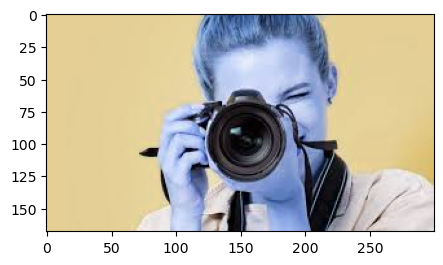

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img)

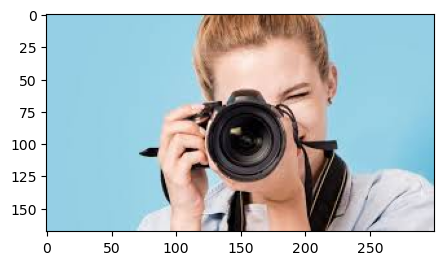

In [8]:
def gray_img(img):
    if img is None :
        return "Image is not present "
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    plt.figure(figsize=(5,5))
    plt.imshow(img_gray)

gray_img(img)

 The Shape of the image: (168, 300, 3)
 The data type to be printed uint8


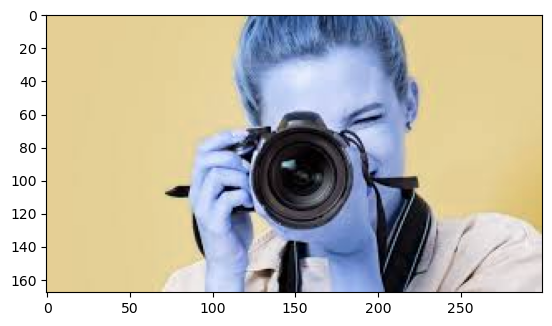

In [13]:
print(" The Shape of the image:",img.shape)
print(" The data type to be printed", img.dtype)
plt.imshow(img,cmap="gray")

In [16]:
def show_bgr(img, title="Image"):
    """Display a BGR (OpenCV) image as RGB using matplotlib."""
    if img is None:
        raise ValueError("Image is None. Check the image path.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

Pixel value at (y=50, x=100) [B, G, R]: [231 212 161]


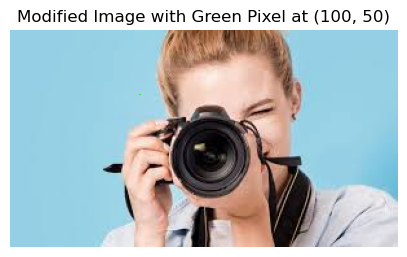

In [17]:
y,x=50,100
pixel_bgr=img[y,x]
print(f"Pixel value at (y={y}, x={x}) [B, G, R]:", pixel_bgr)
img_modified=img.copy()
img_modified[y,x]=[0,255,0]
show_bgr(img_modified, f"Modified Image with Green Pixel at ({x}, {y})")

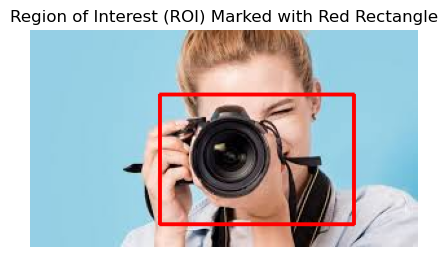

In [18]:
y1, y2 = 50, 150
x1, x2 = 100, 250

img_roi_demo = img.copy()
cv2.rectangle(img_roi_demo,(x1,y1),(x2,y2),(0,0,255),2)
show_bgr(img_roi_demo, "Region of Interest (ROI) Marked with Red Rectangle")


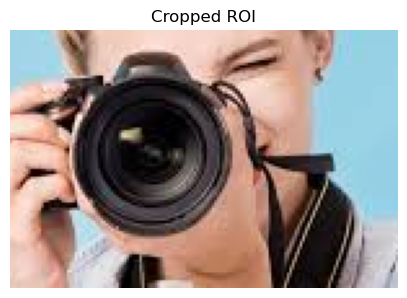

In [19]:
roi = img[y1:y2, x1:x2]
show_bgr(roi, "Cropped ROI")

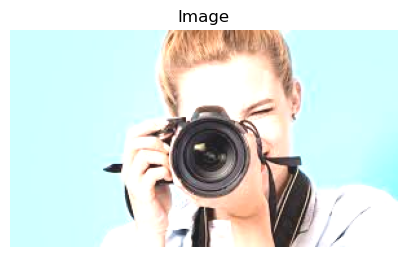

In [20]:
alpha =1.2
beta=30
bright_contrast=cv2.convertScaleAbs(img,alpha=alpha,beta=beta)
show_bgr(bright_contrast)

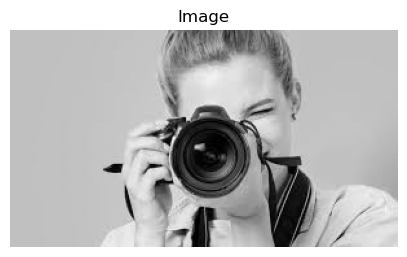

In [21]:
gray_cv=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_bgr(gray_cv)

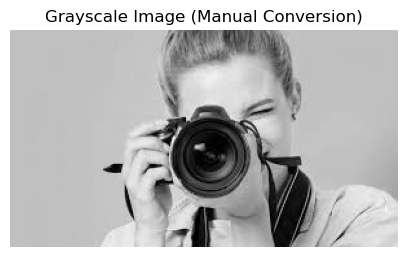

In [24]:
import numpy as np
B = img[:, :, 0].astype(np.float32)
G = img[:, :, 1].astype(np.float32)
R = img[:, :, 2].astype(np.float32)

# Weighted sum for grayscale
gray_manual = 0.114 * B + 0.587 * G + 0.299 * R
gray_manual = np.clip(gray_manual, 0, 255).astype(np.uint8)

show_bgr(gray_manual, "Grayscale Image (Manual Conversion)")

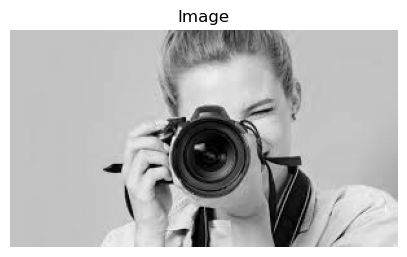

In [27]:
gray_avg=img.mean(axis=2).astype(np.uint8)
show_bgr(gray_avg)

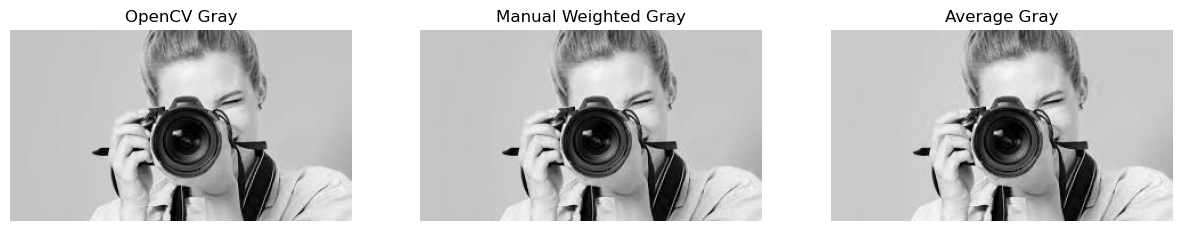

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_cv, cmap='gray')
plt.title('OpenCV Gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_manual, cmap='gray')
plt.title('Manual Weighted Gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_avg, cmap='gray')
plt.title('Average Gray')
plt.axis('off')

plt.show()


In [30]:
gray=gray_cv
horizontal_proj=np.sum(gray,axis=1)

vertical_proj=np.sum(gray,axis=0)

print("Horizontal projection shape:", horizontal_proj.shape)
print("Vertical projection shape:", vertical_proj.shape)


Horizontal projection shape: (168,)
Vertical projection shape: (300,)


In [31]:
print("Horizontal projection shape:", horizontal_proj.shape)
print("Vertical projection shape:", vertical_proj.shape)


Horizontal projection shape: (168,)
Vertical projection shape: (300,)


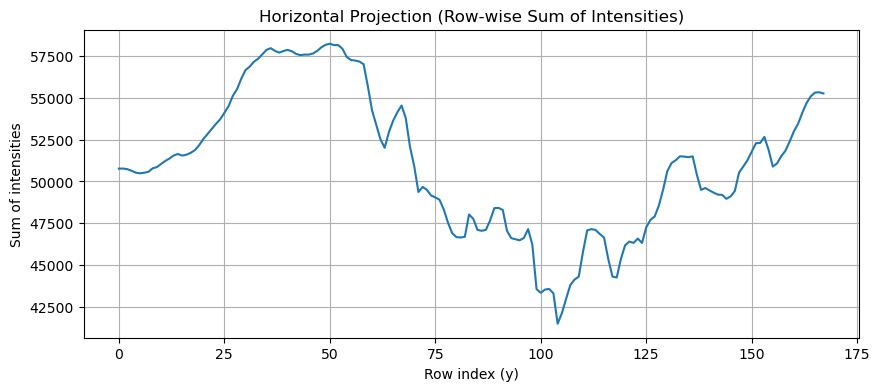

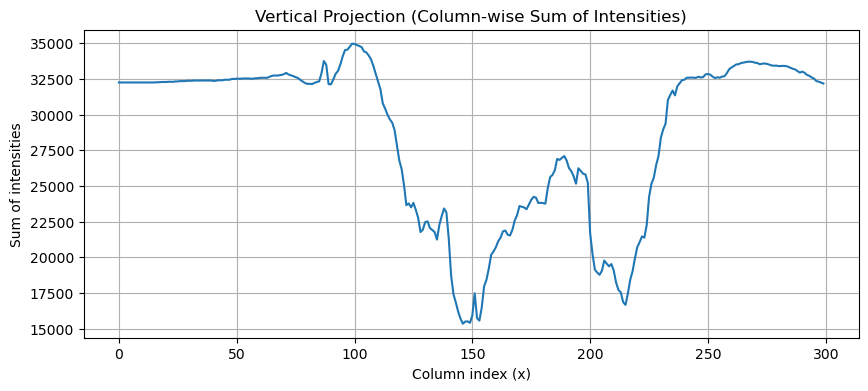

In [32]:

plt.figure(figsize=(10, 4))
plt.plot(horizontal_proj)
plt.title('Horizontal Projection (Row-wise Sum of Intensities)')
plt.xlabel('Row index (y)')
plt.ylabel('Sum of intensities')
plt.grid(True)
plt.show()

"""### 5.2 Visualizing the Vertical Projection"""

plt.figure(figsize=(10, 4))
plt.plot(vertical_proj)
plt.title('Vertical Projection (Column-wise Sum of Intensities)')
plt.xlabel('Column index (x)')
plt.ylabel('Sum of intensities')
plt.grid(True)
plt.show()

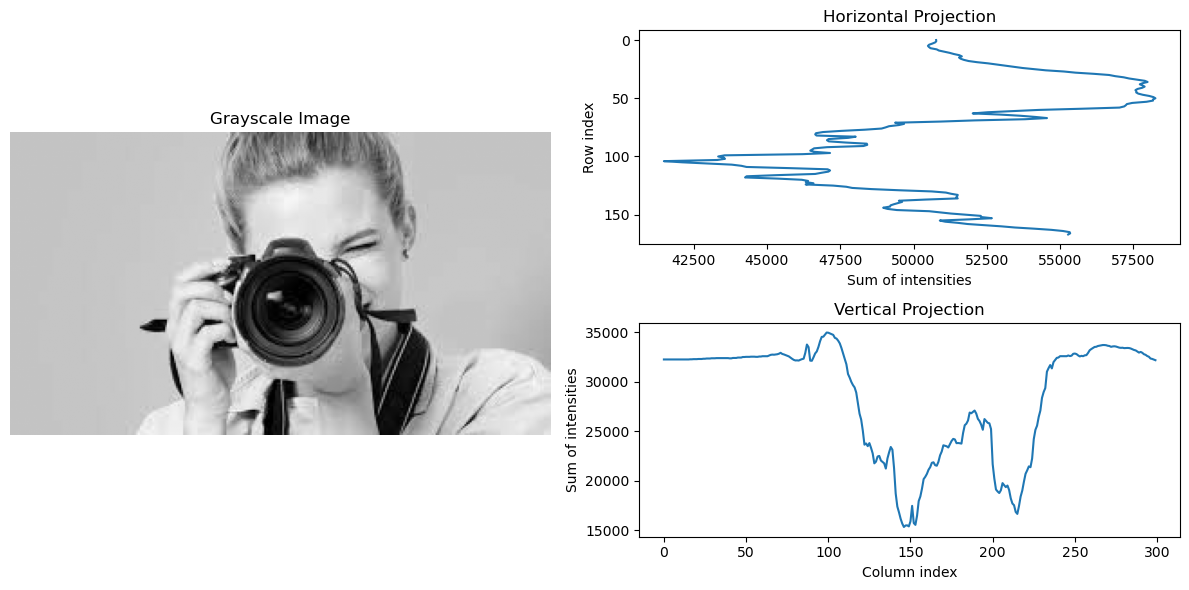

In [33]:

fig = plt.figure(figsize=(12, 6))

# Show grayscale image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(gray, cmap='gray')
ax1.set_title('Grayscale Image')
ax1.axis('off')

# Show both projections in one figure (stacked)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(horizontal_proj, np.arange(len(horizontal_proj)))
ax2.invert_yaxis()
ax2.set_title('Horizontal Projection')
ax2.set_xlabel('Sum of intensities')
ax2.set_ylabel('Row index')

ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(np.arange(len(vertical_proj)), vertical_proj)
ax3.set_title('Vertical Projection')
ax3.set_xlabel('Column index')
ax3.set_ylabel('Sum of intensities')

plt.tight_layout()
plt.show()